In [16]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Scenario 1 ")
print("Gowtham S - 24BAD028 ")

Scenario 1 
Gowtham S - 24BAD028 


In [17]:
# Load Dataset
df = pd.read_csv("breast-cancer.csv")
print("Dataset Shape:", df.shape)
print(df.head())

# Select required features
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean']

X = df[features]
y = df['diagnosis']

Dataset Shape: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  

In [18]:
# Encode Target Labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=42
)


In [19]:
# Train KNN Classifier (Default K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluation Metrics
print("KNN Performance (K=5)")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

KNN Performance (K=5)
Accuracy : 0.9298245614035088
Precision: 0.9322033898305084
Recall   : 0.873015873015873
F1 Score : 0.9016393442622951


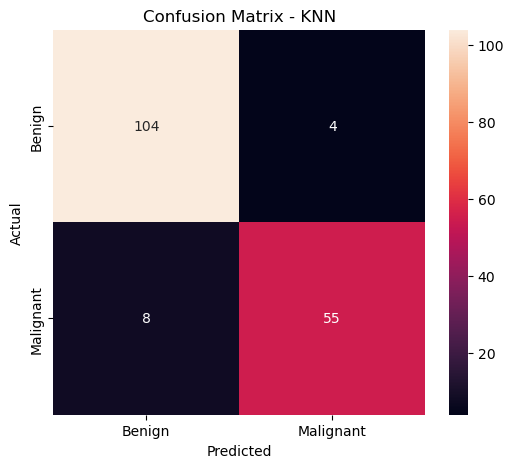

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

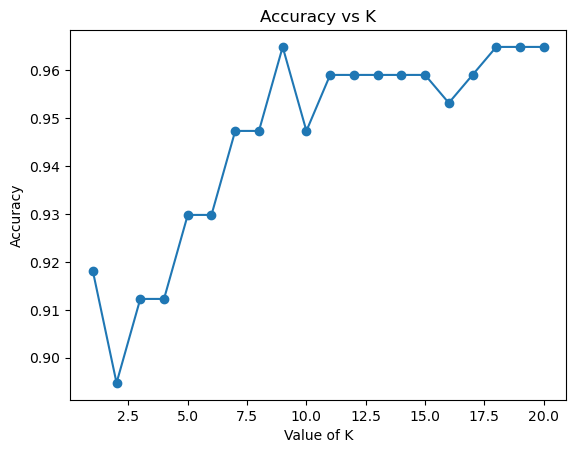

Best K based on accuracy: 9


In [21]:
# Experiment with Different K Values
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))

plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print("Best K based on accuracy:", best_k)

Number of Misclassified Cases: 12


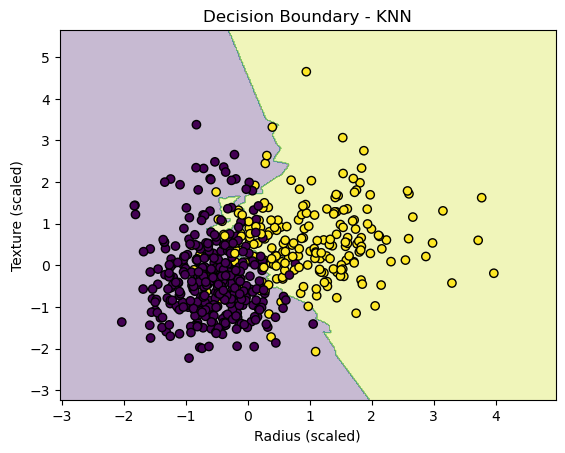

In [22]:
# Misclassified Cases
misclassified = X_test[y_test != y_pred]
print("Number of Misclassified Cases:", len(misclassified))


# Decision Boundary (Using Two Features Only)
X_two = df[['radius_mean', 'texture_mean']]
X_two_scaled = scaler.fit_transform(X_two)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two_scaled, y,
    test_size=0.3,
    random_state=42
)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)

x_min, x_max = X_two_scaled[:, 0].min() - 1, X_two_scaled[:, 0].max() + 1
y_min, y_max = X_two_scaled[:, 1].min() - 1, X_two_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_two_scaled[:, 0], X_two_scaled[:, 1], c=y, edgecolor='k')
plt.xlabel("Radius (scaled)")
plt.ylabel("Texture (scaled)")
plt.title("Decision Boundary - KNN")
plt.show()

In [33]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Scenario 2 ")
print("Gowtham S - 24BAD028 ")

Scenario 2 
Gowtham S - 24BAD028 


In [24]:
# Load Dataset
df = pd.read_csv("loan_prediction.csv")
print("Dataset Shape:", df.shape)
print(df.head())
# Data Preprocessing

features = ['ApplicantIncome', 'LoanAmount',
            'Credit_History', 'Education', 'Property_Area']

target = 'Loan_Status'
df = df[features + [target]]

Dataset Shape: (614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural          

In [25]:
# Handle Missing Values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Encode Categorical Variables
encoder = LabelEncoder()

df['Education'] = encoder.fit_transform(df['Education'])
df['Property_Area'] = encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])  # Y=1, N=0

C:\Users\HP\AppData\Local\Temp\ipykernel_18800\1117124997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18800\1117124997.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [26]:
# Define X and y
X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Train Decision Tree 
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [27]:
# Evaluation Metrics
print("Decision Tree Performance")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Decision Tree Performance
Accuracy : 0.6972972972972973
Precision: 0.7424242424242424
Recall   : 0.8166666666666667
F1 Score : 0.7777777777777778


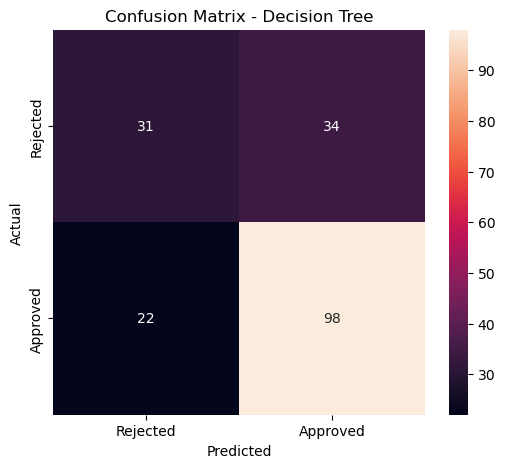

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Rejected','Approved'],
            yticklabels=['Rejected','Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


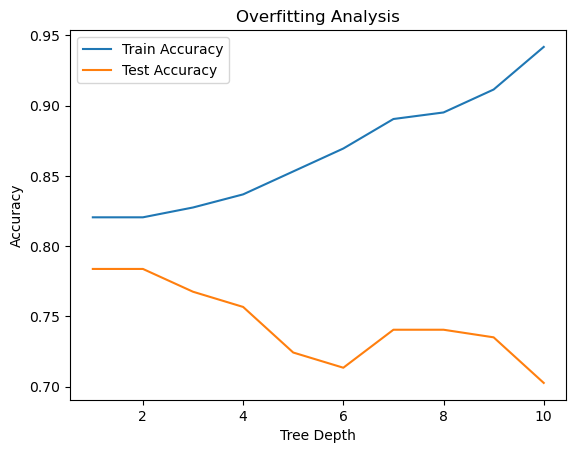

In [29]:
# Experiment with Tree Depth
depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure()
plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.show()

In [30]:
# Compare Shallow vs Deep Tree
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
deep_tree = DecisionTreeClassifier(random_state=42)

shallow_tree.fit(X_train, y_train)
deep_tree.fit(X_train, y_train)

print("\nShallow Tree Accuracy:", shallow_tree.score(X_test, y_test))
print("Deep Tree Accuracy:", deep_tree.score(X_test, y_test))


Shallow Tree Accuracy: 0.7675675675675676
Deep Tree Accuracy: 0.6972972972972973


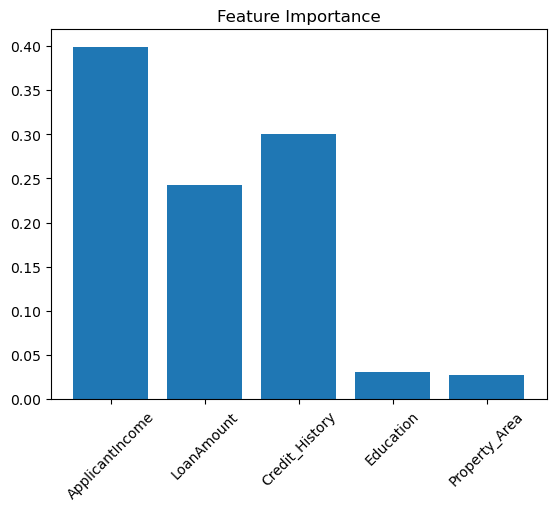

In [31]:
# Feature Importance
importances = tree.feature_importances_
plt.figure()
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

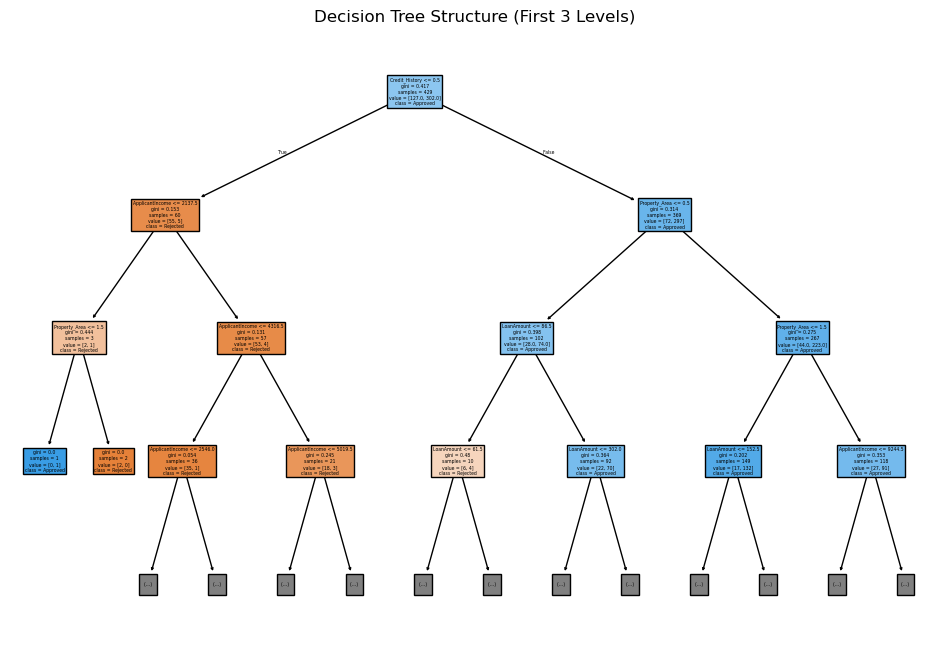

In [32]:
# Tree Structure Plot
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=features,
          class_names=['Rejected','Approved'],
          filled=True, max_depth=3)
plt.title("Decision Tree Structure (First 3 Levels)")
plt.show()